## <h1> Customer Segmentation Using KMeans Clustering </h1> 
<strong><p> Problem Statement </p></strong>
<p>Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.</p> 

<p>Dataset :- </p>

## IMPORTING LIBRARIES

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

## DATA EXPLORATION

In [47]:
import pandas as pd 
df = pd.read_csv("D:\ipsita_folder\cb1222e506c1266b9cc808143ddbab82-b2fe8213426159be7f9c8de108726d3d814153eb\mall_customers.csv")
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
df.shape

(200, 5)

In [49]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [50]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

In [51]:
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

### DATA VISUALIZATION

In [52]:
plt.style.use('fivethirtyeight')

### Histograms

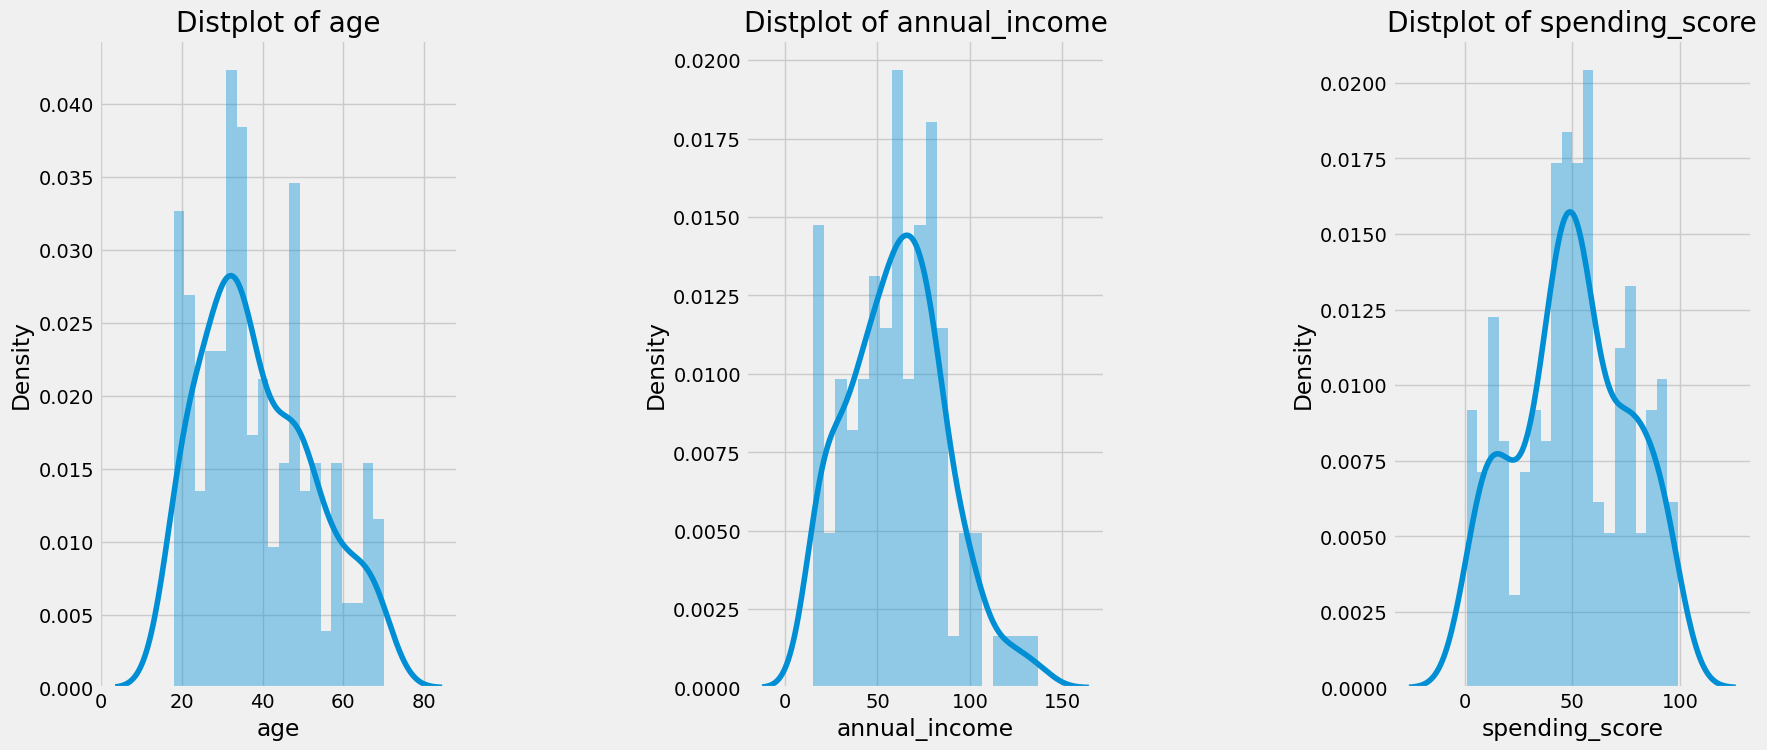

In [53]:
plt.figure(1 , figsize = (19 , 8))
n = 0 
for x in ['age' , 'annual_income' , 'spending_score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.8 , wspace = 0.8)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### COUNT PLOT OF GENDER

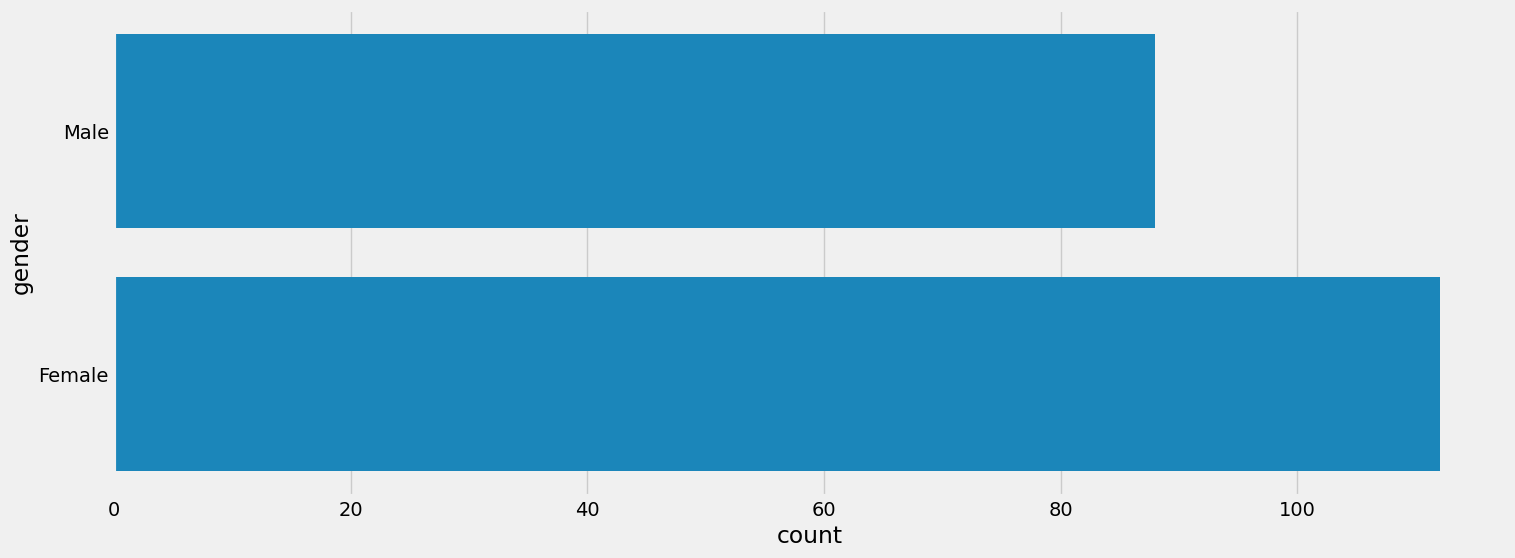

In [54]:
plt.figure(1 , figsize = (16 , 6))
sns.countplot(y = 'gender' , data = df)
plt.show()

### PLOTING THE RELATION BETWEEN AGE, ANNUAL INCOME, SOENDING SCORE

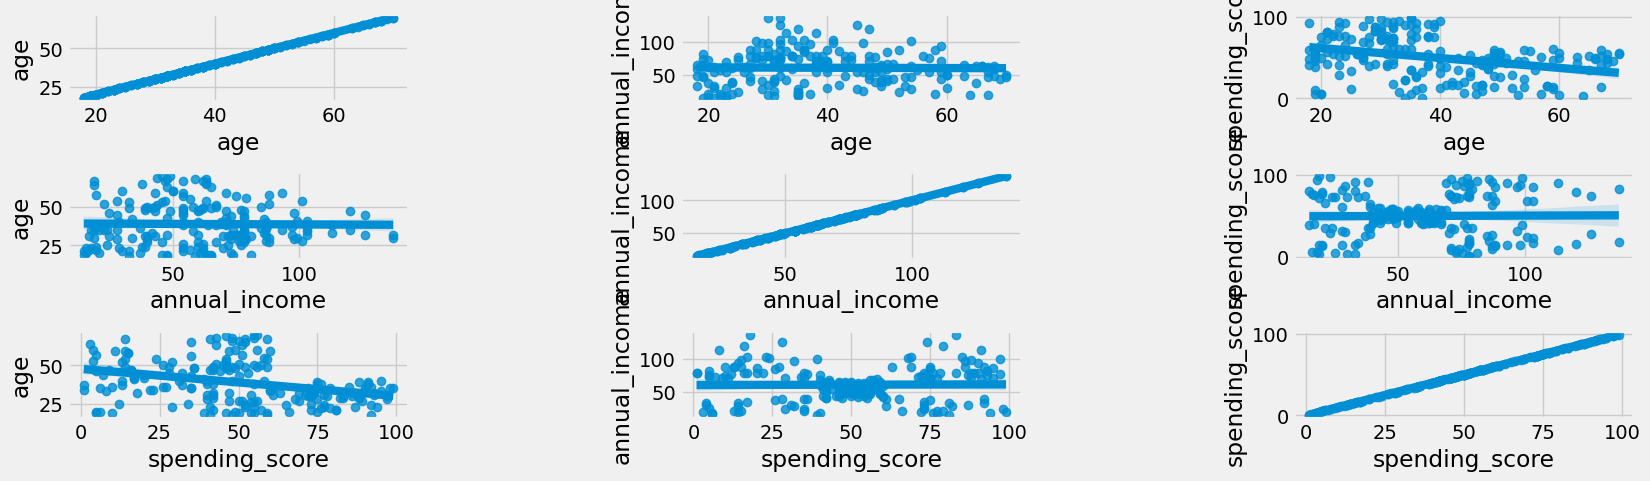

In [55]:
plt.figure(1 , figsize = (18 , 5))
n = 0 
for x in ['age' , 'annual_income' , 'spending_score']:
    for y in ['age' , 'annual_income' , 'spending_score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.8 , wspace = 0.8)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

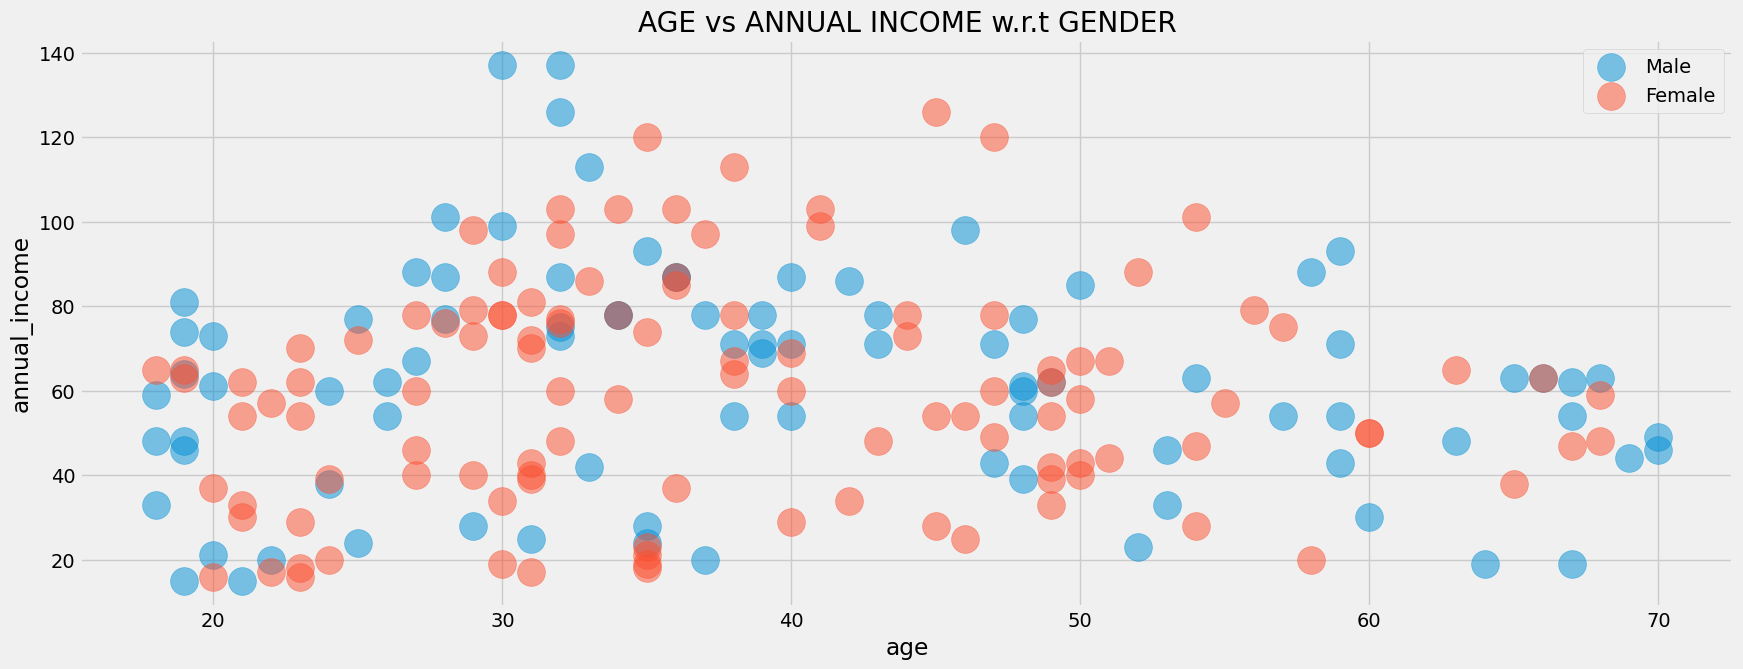

In [56]:
plt.figure(1 , figsize = (19 , 7))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'age' , y = 'annual_income' , data = df[df['gender'] == gender] ,
                s = 400 , alpha = 0.5 , label = gender)
plt.xlabel('age'), plt.ylabel('annual_income') 
plt.title('AGE vs ANNUAL INCOME w.r.t GENDER')
plt.legend()
plt.show()

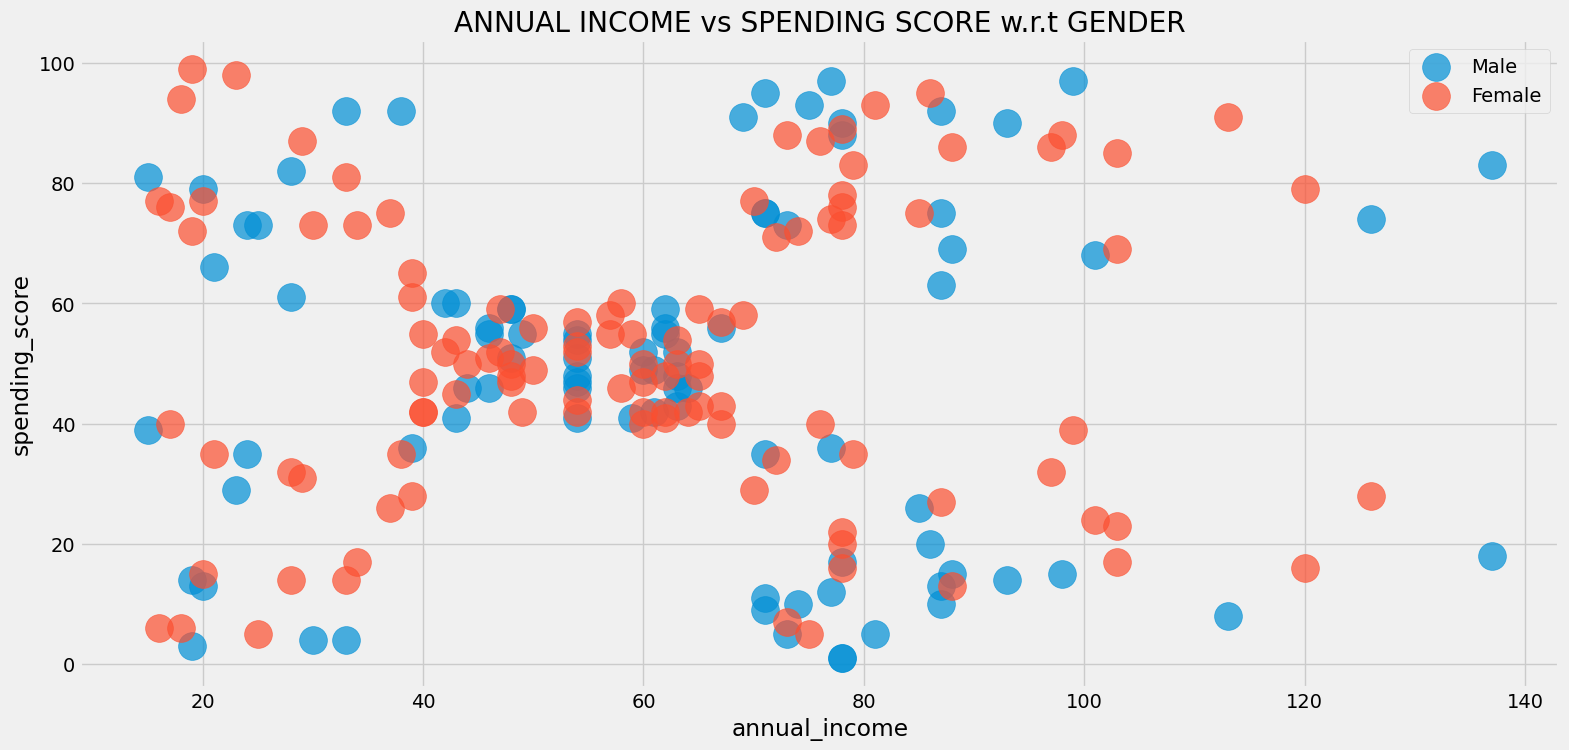

In [57]:
plt.figure(1 , figsize = (17 , 8))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'annual_income',y = 'spending_score' ,
                data = df[df['gender'] == gender] ,s = 400 , alpha = 0.7 , label = gender)
plt.xlabel('annual_income'), plt.ylabel('spending_score') 
plt.title('ANNUAL INCOME vs SPENDING SCORE w.r.t GENDER')
plt.legend()
plt.show()

### DISTRIBUTE THE VALUES IN AGE, ANNUAL INCOME, SPENDING SCORE W.R.T GENDER

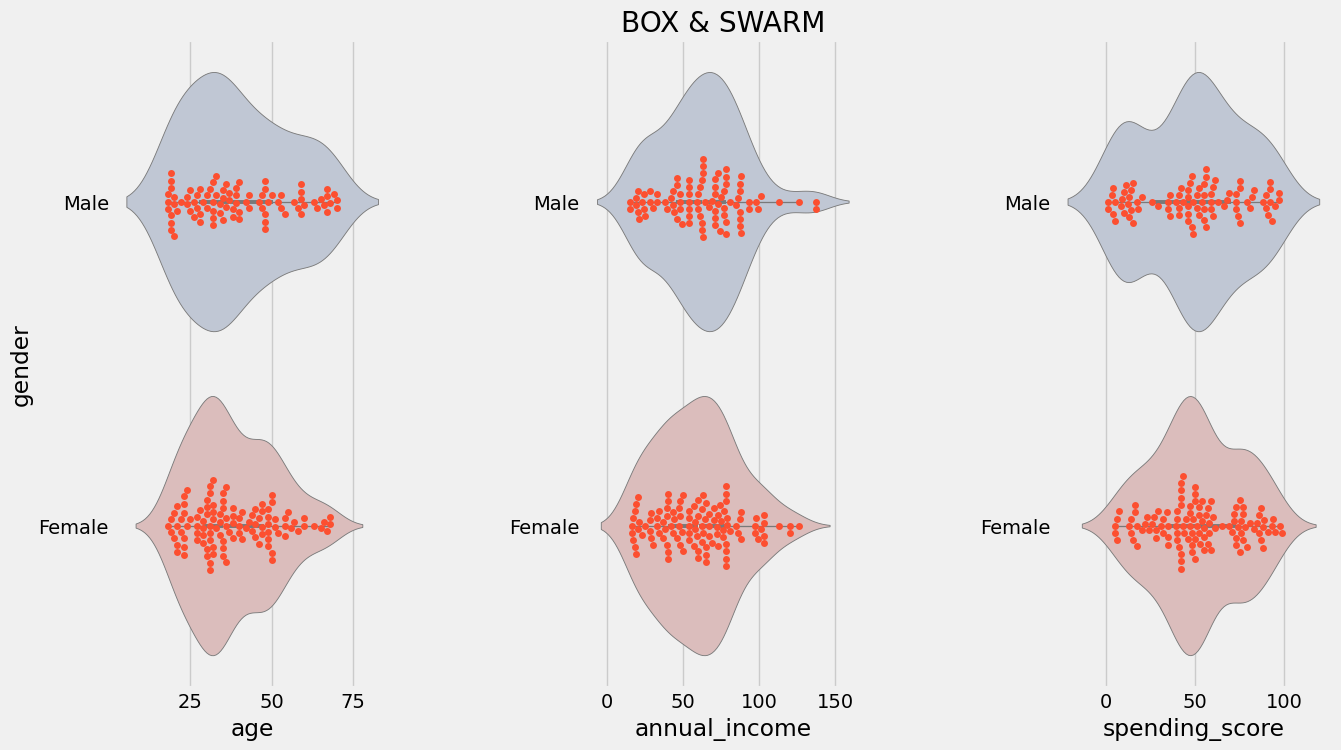

In [58]:
plt.figure(1 , figsize = (14, 8))
n = 0 
for cols in ['age' , 'annual_income' , 'spending_score']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.7 , wspace = 0.7)
    sns.violinplot(x = cols , y = 'gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'gender' , data = df)
    plt.ylabel('gender' if n == 1 else '')
    plt.title('BOX & SWARM' if n == 2 else '')
plt.show()

## K- MEANS CLUSTERING
### *Segmentating Age and Spending Score

In [59]:
X1 = df[['age' , 'spending_score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Select N Clusters based on inertia (squared distance between centroids and data points should be less)

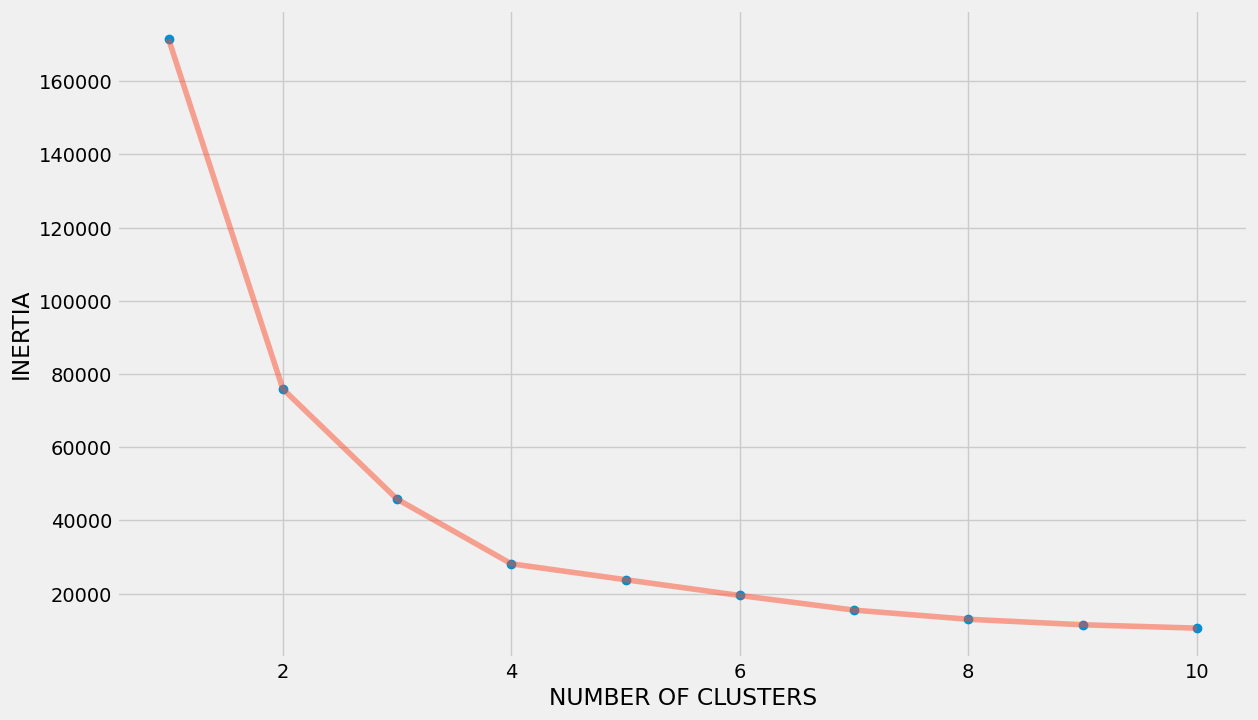

In [60]:
plt.figure(1 , figsize = (13,8))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('NUMBER OF CLUSTERS') , plt.ylabel('INERTIA')
plt.show()

In [61]:
algorithm = (KMeans(n_clusters = 4 ,init ='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [62]:
h = 0.04
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

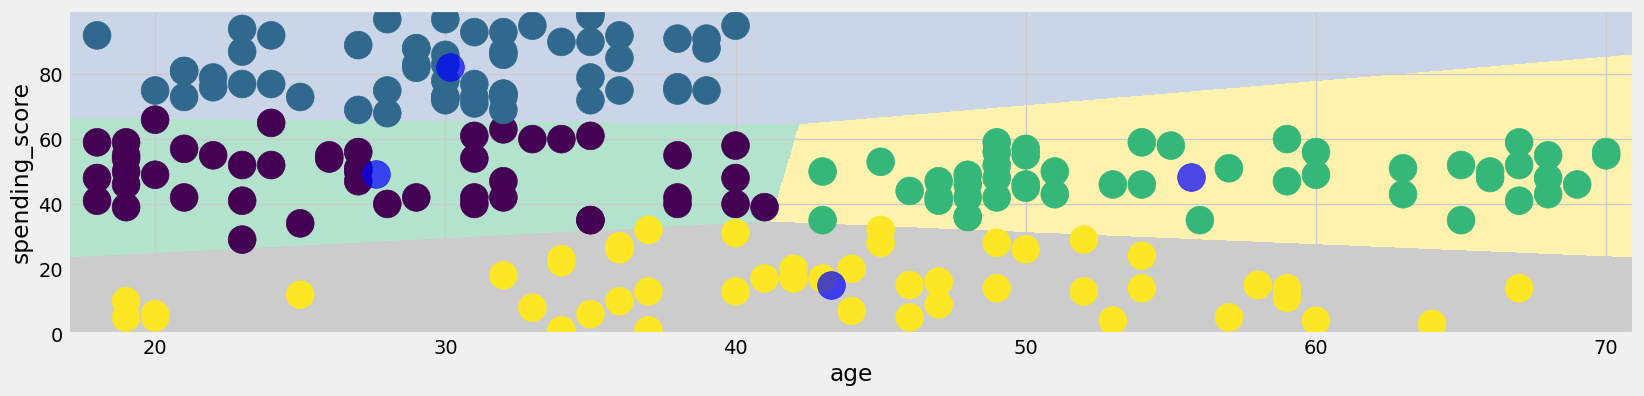

In [63]:
plt.figure(1 , figsize = (18, 4) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'age' ,y = 'spending_score' , data = df , c = labels1 , 
            s = 400 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 400 , c = 'blue' , alpha = 0.7)
plt.ylabel('spending_score') , plt.xlabel('age')
plt.show()

### *Segmentating Annual Income and Spending Score

In [64]:
X2 = df[['annual_income', 'spending_score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 20 ,max_iter= 400, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

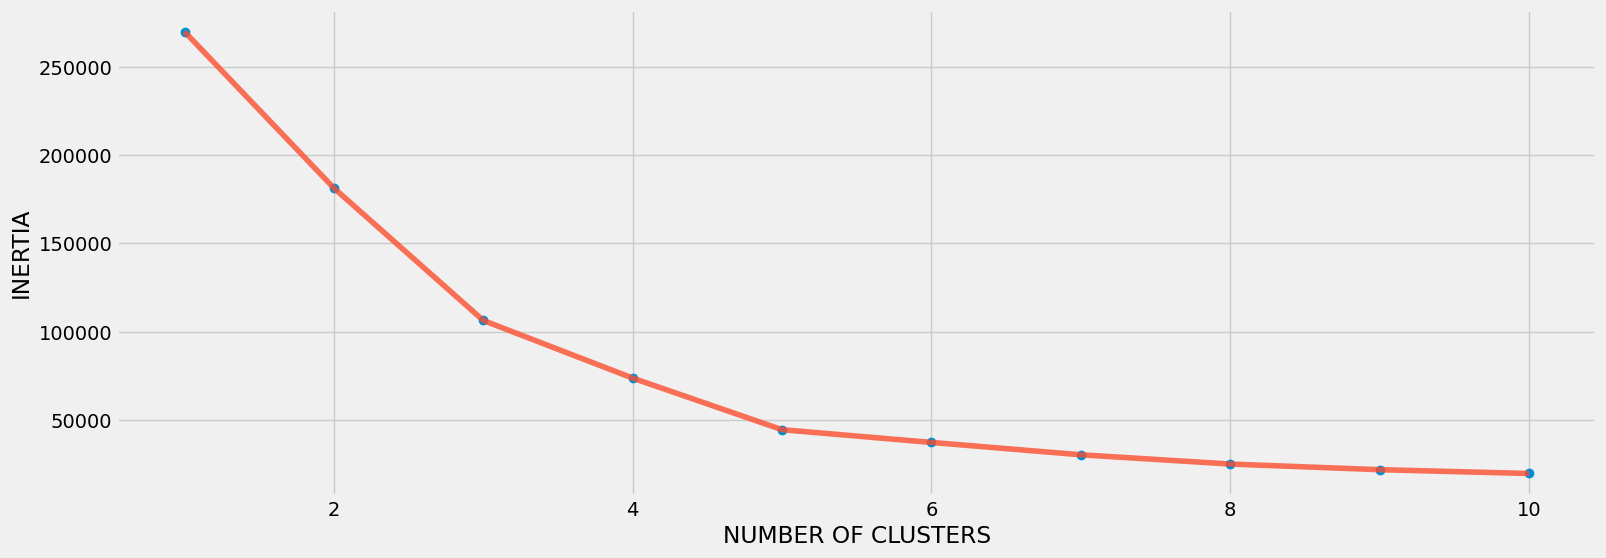

In [65]:
plt.figure(1 , figsize = (17 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.8)
plt.xlabel('NUMBER OF CLUSTERS') , plt.ylabel('INERTIA')
plt.show()

In [66]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 30 ,max_iter=200, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [67]:
h = 0.07
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

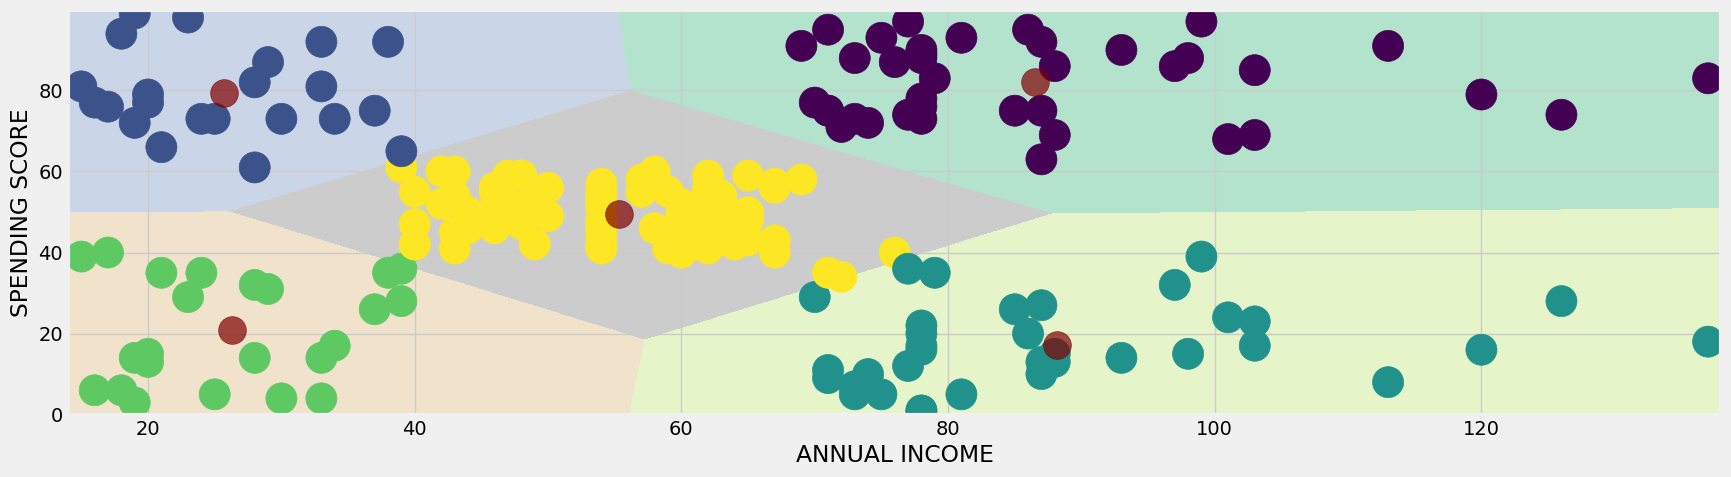

In [68]:
plt.figure(1 , figsize = (19, 5) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'annual_income' ,y = 'spending_score' , data = df , c = labels2 , 
            s = 500 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 400 , c = 'maroon' , alpha = 0.7)
plt.ylabel('SPENDING SCORE') , plt.xlabel('ANNUAL INCOME')
plt.show()

### *Segmentating Age, Annual Income Spending Score

In [69]:
X3 = df[['age', 'annual_income','spending_score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 30 ,max_iter=200, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

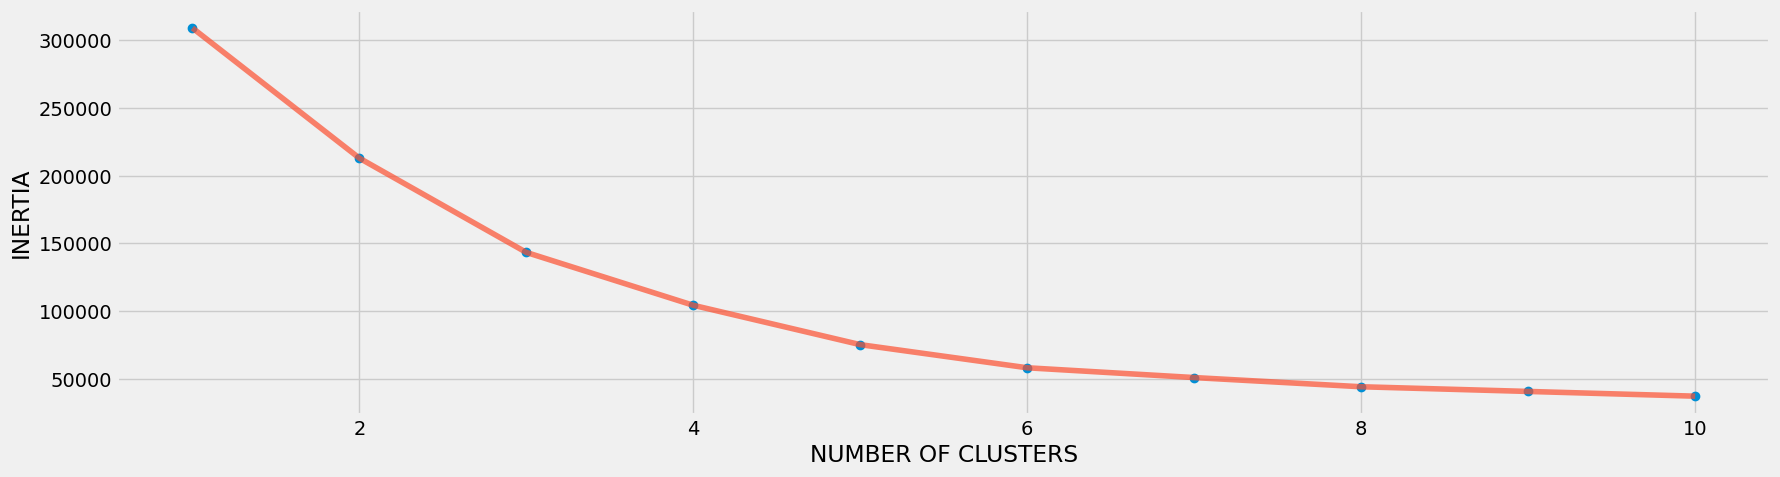

In [70]:
plt.figure(1 , figsize = (19,5))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.7)
plt.xlabel('NUMBER OF CLUSTERS') , plt.ylabel('INERTIA')
plt.show()

In [71]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 40 ,max_iter=500, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [72]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['age'],
    y= df['spending_score'],
    z= df['annual_income'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 11
        ),
        opacity=0.4
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'AGE'),
            yaxis = dict(title  = 'SPENDING SCORE'),
            zaxis = dict(title  = 'ANNUAL INCOME')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## FEATURE SELECTION FOR MODEL
### Annual income and Spending Score

In [73]:
df.head(10)

,customer_id,gender,age,annual_income,spending_score,label3
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
5,6,Female,22,17,76,5
6,7,Female,35,18,6,4
7,8,Female,23,18,94,5
8,9,Male,64,19,3,4
9,10,Female,30,19,72,5


In [74]:
X= df.iloc[:, [3,4]].values

## BUILD THE MODEL
# KMeans Algorithm for deciding optimum cluster number KMeans++ using ELBOW METHOD


In [75]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

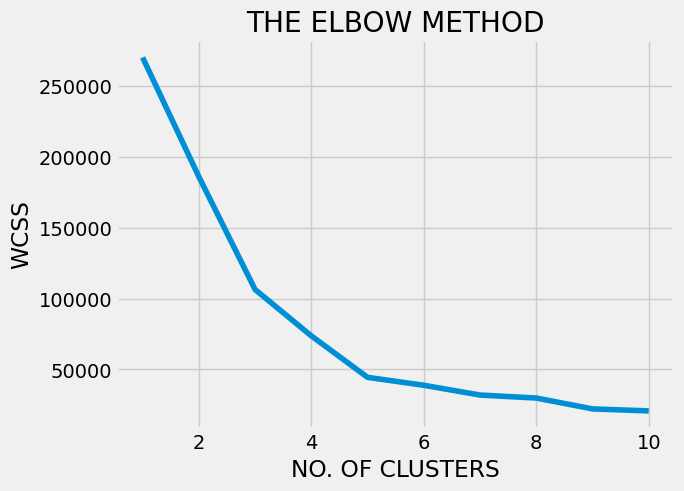

In [76]:
plt.plot(range(1,11), wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('NO. OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

### MODEL BUILDING

In [77]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

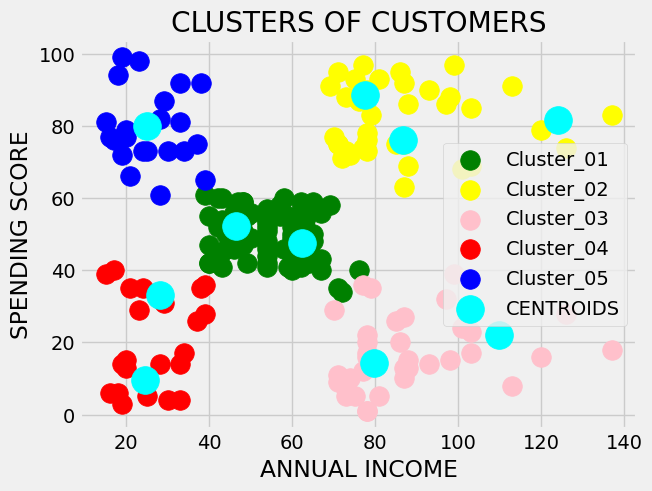

In [78]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 200, c = 'green', label = 'Cluster_01')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 200, c = 'yellow', label = 'Cluster_02')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 200, c = 'pink', label = 'Cluster_03')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 200, c = 'red', label = 'Cluster_04')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 200, c = 'blue', label = 'Cluster_05')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'cyan', label = 'CENTROIDS')
plt.title('CLUSTERS OF CUSTOMERS')
plt.xlabel('ANNUAL INCOME')          
plt.ylabel('SPENDING SCORE')
plt.legend()
plt.show()

## MODEL INTERPRETATION 
* <p style="color:pink;"> Cluster_01: High earning but less spending</p> 
* <p style="color:cyan;"> Cluster_02: Average earning and spending</p> 
* <p style="color:yellow;"> Cluster_03: High earning as well as high spending (TARGET SET)</p> 
* <p style="color:red;"> Cluster_04: Less earning but spending more</p> 
* <p style="color:blue;">Cluster 5 : Less earning, less spemding</p>  